In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [46]:
def preProcessSplitData(data, y_offset=0):
    # Correct circulating pump power values
    data['circulatingPumpDutyCycle'] = data['circulatingPumpDutyCycle']*data['getCirculatingPumpRelay']

    # Split the data into input features (X) and target variable (y)
    feature_cols = ['hp1PowerInput', 'circulatingPumpDutyCycle', 'getFanSpeed', 'bottomPlateHeaterEnable', 'compressorCrankcaseHeaterEnable']
    # feature_cols = ['hp1PowerInput', 'getFanSpeed']
    X = data[feature_cols]

    # y = data['PowerIn']
    y = data['externalElectricityMeterPower'] + y_offset

    if y.isna().any():
        idx = y[~y.isna()].index
        y = y[y.index.isin(idx)]
        X = X[X.index.isin(idx)]

    return X, y

In [52]:
# Load training data from CSV file into a pandas DataFrame
# train_data_file = "data/Power consuption-data-CIC-e265a6ef-8365-5bab-a661-c23935c3c6ea.csv"
train_data_file = "data/Power consuption-data-CIC-7eede49c-42c2-5b41-94aa-481dad189abf.csv"
train_data = pd.read_csv(train_data_file, header=0)

# Pre-process and split data
# scaler = StandardScaler()
X_train, y_train = preProcessSplitData(train_data)

Coefficients =  [1.1217884388080628, 0.8330896651749234, -0.027004709566092543, 153.48114839967263, 0.0, 15.637515787626057]
rmse =  10.982573579261423
mae =  3.615523058208795


ValueError: x and y must have same first dimension, but have shapes (29094,) and (29092,)

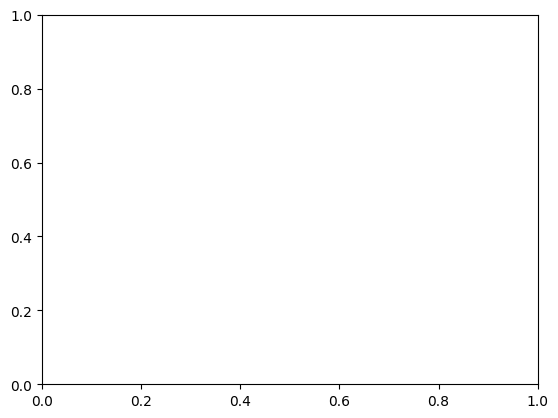

In [53]:
# Create a Lasso model with alpha=0.1 (controls the strength of regularization)
lasso = Lasso(alpha=0.1, fit_intercept=True)

# Train the model on the training data
lasso.fit(X_train, y_train)

# Evaluate
print("Coefficients = ", list(lasso.coef_) + [lasso.intercept_])
y_train_pred = lasso.predict(X_train)
print("rmse = ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("mae = ", mean_absolute_error(y_train, y_train_pred))

# Plot the training target against the predicted values
plt.plot(train_data.index, y_train, train_data.index, y_train_pred)
plt.xlabel('Time index')
plt.ylabel('Measured and predicted values')
plt.title('Training data: Target vs Predictions')
plt.legend(['Measured', 'Predicted'])
plt.show()

Coefficients =  [1.1174891626105627, 1.011391018167193, -0.031006288023644135, 159.49972140302296, 0.0, 5.091515651849022]
rmse =  16.24142769673187
mae =  5.467477336042288


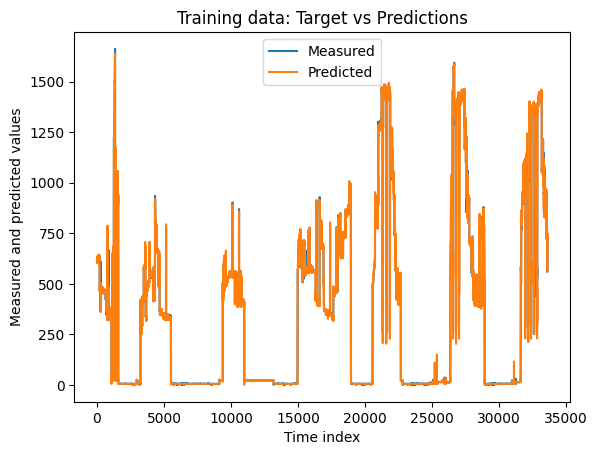

In [ ]:
# Create a Lasso model with alpha=0.1 (controls the strength of regularization)
linreg = LinearRegression(fit_intercept=True)

# Train the model on the training data
linreg.fit(X_train, y_train)

# Evaluate
print("Coefficients = ", list(linreg.coef_) + [linreg.intercept_])
y_train_pred = linreg.predict(X_train)
print("rmse = ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
# print("mse = ", mean_squared_error(y_train, y_train_pred))
print("mae = ", mean_absolute_error(y_train, y_train_pred))

# Plot the training target against the predicted values
plt.plot(train_data.index, y_train, train_data.index, y_train_pred)
plt.xlabel('Time index')
plt.ylabel('Measured and predicted values')
plt.title('Training data: Target vs Predictions')
plt.legend(['Measured', 'Predicted'])
plt.show()

In [92]:
print(linreg.intercept_)

16.84311924695146


In [50]:

def evaluate_model(model, X_test, y_test):
    # Evaluate the model on the test data using mean squared error (MSE)
    y_pred = linreg.predict(X_test)

    # Evaluate
    print("rmse = ", np.sqrt(mean_squared_error(y_test, y_pred)))
    # print("mse = ", mean_squared_error(y_train, y_train_pred))
    print("mae = ", mean_absolute_error(y_test, y_pred))

    # Plot the training target against the predicted values
    plt.plot(X_test.index, y_test, X_test.index, y_pred)
    plt.xlabel('Time index')
    plt.ylabel('Measured and predicted values')
    plt.title('Test data: Target vs Predictions')
    plt.legend(['Measured', 'Predicted'])
    plt.show()

rmse =  18.25305781271744
mae =  9.445093193608825


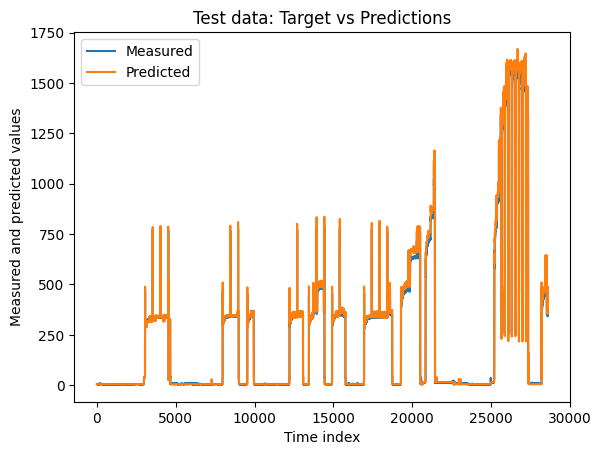

rmse =  11.165820085660956
mae =  4.531622623565152


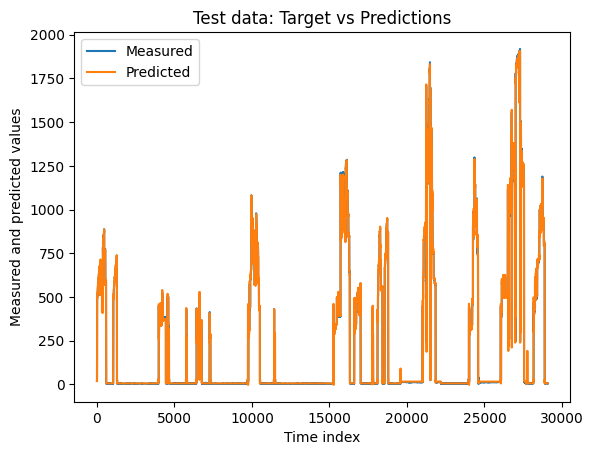

rmse =  16.24142769673187
mae =  5.467477336042288


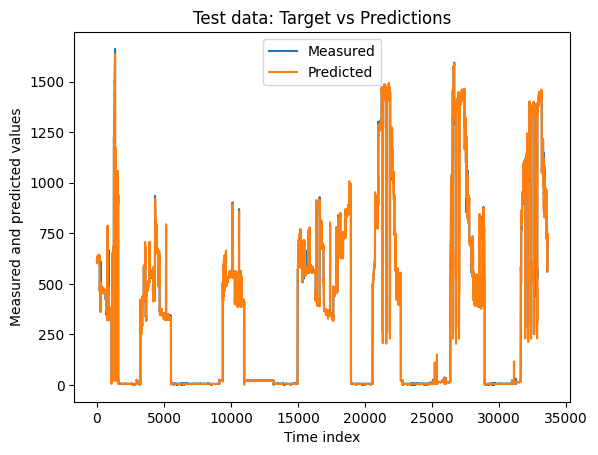

rmse =  23.58175360066496
mae =  10.564221483497583


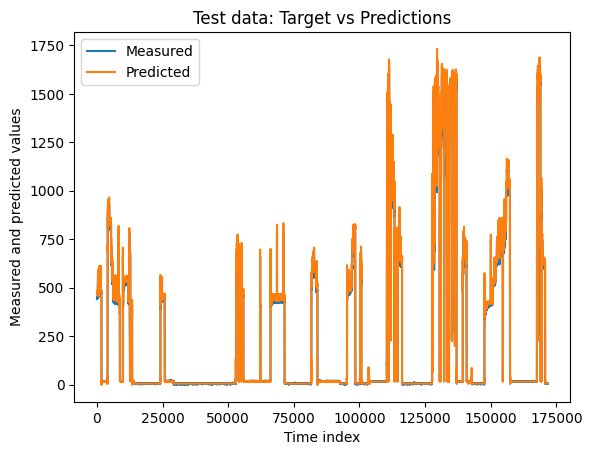

In [51]:
# Load test data from CSV file into a pandas DataFrame
test_data_files = ['Power consuption-data-CIC-9368bfef-7eca-5bda-9a90-8d5a4be375c6.csv', 
                   'Power consuption-data-CIC-0f293b7a-4524-5fc7-84b9-66f80a5a6d7c.csv', 
                   'Power consuption-data-CIC-7eede49c-42c2-5b41-94aa-481dad189abf.csv',
                   'Power consuption-data-CIC-e265a6ef-8365-5bab-a661-c23935c3c6ea.csv']
offsets = [-12, -12, 0, 0]
# test_data_file = "data/Energy measurements validation CIC-0f293b7a-4524-5fc7-84b9-66f80a5a6d7c - Power consuption-data-2023-03-22 16_00_42.csv"
for test_data_file, offset in zip(test_data_files, offsets):
    test_data = pd.read_csv('data/' + test_data_file, header=0)

    # Split the data into input features (X) and target variable (y)
    X_test, y_test = preProcessSplitData(test_data, offset)
    evaluate_model(linreg, X_test=X_test, y_test=y_test)